In [1]:
%cd /mnt/work/Code/lung-diffusion

/mnt/work/Code/lung-diffusion


In [2]:
ddim_vqmodel_f16_mnist = "./outputs/ddim_vqmodel_f16_mnist/checkpoints/last.ckpt"

In [26]:
import math
import torch
import matplotlib.pyplot as plt
from torchvision.utils import make_grid, save_image
from src.models.diffusion_module import DiffusionModule

In [4]:
model = DiffusionModule.load_from_checkpoint(ddim_vqmodel_f16_mnist)

/mnt/work/Code/lung-diffusion/env/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:196: UserWarning: Attribute 'net' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['net'])`.
  rank_zero_warn(
/mnt/work/Code/lung-diffusion/env/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:196: UserWarning: Attribute 'sampler' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['sampler'])`.
  rank_zero_warn(
/mnt/work/Code/lung-diffusion/env/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:196: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(


Keeping EMAs of 224.


Sampling t: 100%|██████████| 50/50 [00:01<00:00, 40.69it/s]


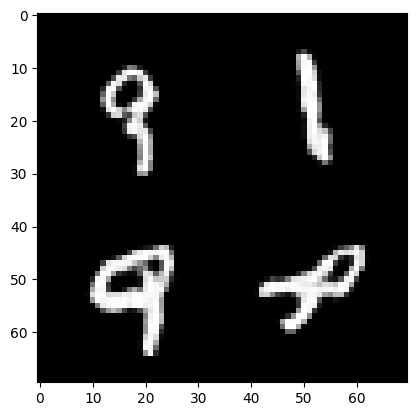

In [51]:
BATCH_SIZE = 4
xt = torch.randn(4, 1, 32, 32).to("cuda")
out_images = model.log_image(xt, device="cuda")
out_images = make_grid(
   out_images, 
   nrow=int(math.sqrt(BATCH_SIZE)), 
   normalize=True, 
   value_range=(0, 1)
)

# Convert and display the image
plt.imshow(out_images.permute(1, 2, 0).cpu().detach().numpy(), cmap="gray")
plt.show()
